# Case1: E-Ticaret Veri Seti

**AIDefenders** <br>
Kübra KARABULUT, Abdulkadir SADİ

## 1. Giriş ve Veri Yükleme

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

* Gerekli Kütüphaneleri Import Ettik.

In [4]:
df = pd.read_csv('E_Commerce_Dataset.csv') # Veri setini okuduk.

## 2. Veri Keşfi ve Ön İşleme

**Veri Setine İlk Bakış**

In [5]:
df.head() # Veri Setindeki İlk 5 Satırı Görüntüledik.

Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0    Ürün5  Ev & Bahçe  Marka5     55            96           283   
1    Ürün8    Kozmetik  Marka1    120            37           835   
2    Ürün8    Aksesuar  Marka5    110            14           457   
3    Ürün9  Ev & Bahçe  Marka4    133             7           254   
4    Ürün2  Ev & Bahçe  Marka3    268            80            35   

   Yorum Sayısı  Ortalama Puan                       Tarih  
0             1            1.9  2024-02-17 15:18:45.291585  
1            11            4.0  2023-07-21 15:18:45.292898  
2             3            2.9  2024-03-19 15:18:45.293026  
3             8            4.7  2024-03-01 15:18:45.293077  
4            12            3.5  2024-05-21 15:18:45.293117

In [6]:
df.tail() # Veri Setindeki Son 5 Satırı Görüntüledik.

Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
995    Ürün1  Elektronik  Marka4    351            73           418   
996    Ürün8  Ev & Bahçe  Marka5    291            63           735   
997    Ürün8  Ev & Bahçe  Marka5    366            28           867   
998    Ürün4    Aksesuar  Marka1     24            29           610   
999    Ürün8       Giyim  Marka3    346            88           859   

     Yorum Sayısı  Ortalama Puan                       Tarih  
995            13            5.0  2023-06-24 15:18:45.327863  
996            33            4.4  2024-04-05 15:18:45.327894  
997             1            3.6  2024-04-26 15:18:45.327925  
998            24            3.8  2023-09-22 15:18:45.327955  
999            45            3.5  2023-09-22 15:18:45.327985

In [7]:
df.shape # Veri Setinde Bulunan Satır ve Sütun Sayılarını Görüntüledik.

(1000, 9)

In [8]:
df.describe() # Veri Setindeki Sayısal Değişkenlerin İncelenmesi.

Fiyat  Stok Miktarı  Satış Sayısı  Yorum Sayısı  Ortalama Puan
count  1000.000000   1000.000000   1000.000000   1000.000000    1000.000000
mean    259.230000     50.301000    506.240000     24.870000       2.998900
std     138.472625     29.489388    283.187418     14.647513       1.154418
min      10.000000      0.000000      1.000000      0.000000       1.000000
25%     140.000000     24.000000    265.750000     13.000000       2.000000
50%     257.000000     51.000000    522.000000     25.000000       3.000000
75%     376.000000     76.000000    743.250000     37.000000       4.000000
max     500.000000    100.000000   1000.000000     50.000000       5.000000

* Count İle NaN Olmayan Veri Sayılarını Görüntüledik. Çıktıdan Eksik Veri Olmadığını Görebiliyoruz.
* Mean İle Her Sütundaki Verilerin Aritmetik Ortalamasını Görüntüledik.
* Std İle Her Sütundaki Verilerin Standart Sapmasını Görüntüledik.
* Min İle Her Sütundaki En Düşük Veriyi Görüntüledik.
* 25% İle Verilerin %25'inin Bu Değerin Altında Olduğunu Görüntüledik.(50% ve 75% de aynı mantıkta çalışır.)
* Max İle Her Sütundaki En Yüksek Veriyi Görüntüledik.

**Eksik Veri Kontrolü**

In [9]:
df.isnull().sum() # Yukarıdan Anlamış Olsak da Eksik Veri Olmadığını Daha Net Göstermiş Olduk.

Ürün Adı         0
Kategori         0
Marka            0
Fiyat            0
Stok Miktarı     0
Satış Sayısı     0
Yorum Sayısı     0
Ortalama Puan    0
Tarih            0
dtype: int64

**Veri Türlerinin Kontrolü**

In [10]:
df.dtypes # Sütunların Hangi Türden Verileri Barındırdığını Gördük.

Ürün Adı          object
Kategori          object
Marka             object
Fiyat              int64
Stok Miktarı       int64
Satış Sayısı       int64
Yorum Sayısı       int64
Ortalama Puan    float64
Tarih             object
dtype: object

In [11]:
df.info() # Veri Setindeki Dolu Verileri ve Veri Türlerini Bir Arada Gösterdik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ürün Adı       1000 non-null   object 
 1   Kategori       1000 non-null   object 
 2   Marka          1000 non-null   object 
 3   Fiyat          1000 non-null   int64  
 4   Stok Miktarı   1000 non-null   int64  
 5   Satış Sayısı   1000 non-null   int64  
 6   Yorum Sayısı   1000 non-null   int64  
 7   Ortalama Puan  1000 non-null   float64
 8   Tarih          1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [12]:
df # Veri Setini Görüntüledik.

Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0      Ürün5  Ev & Bahçe  Marka5     55            96           283   
1      Ürün8    Kozmetik  Marka1    120            37           835   
2      Ürün8    Aksesuar  Marka5    110            14           457   
3      Ürün9  Ev & Bahçe  Marka4    133             7           254   
4      Ürün2  Ev & Bahçe  Marka3    268            80            35   
..       ...         ...     ...    ...           ...           ...   
995    Ürün1  Elektronik  Marka4    351            73           418   
996    Ürün8  Ev & Bahçe  Marka5    291            63           735   
997    Ürün8  Ev & Bahçe  Marka5    366            28           867   
998    Ürün4    Aksesuar  Marka1     24            29           610   
999    Ürün8       Giyim  Marka3    346            88           859   

     Yorum Sayısı  Ortalama Puan                       Tarih  
0               1            1.9  2024-02-17 15:18:45.291585  
1              11            4.0  2023-07-21 15:18:45.292898  
2               3            2.9  2024-03-19 15:18:45.293026  
3               8            4.7  2024-03-01 15:18:45.293077  
4              12            3.5  2024-05-21 15:18:45.293117  
..            ...            ...                         ...  
995            13            5.0  2023-06-24 15:18:45.327863  
996            33            4.4  2024-04-05 15:18:45.327894  
997             1            3.6  2024-04-26 15:18:45.327925  
998            24            3.8  2023-09-22 15:18:45.327955  
999            45            3.5  2023-09-22 15:18:45.327985  

[1000 rows x 9 columns]

## Veri Görselleştirme

**Ürün Kategorilerinin Dağılımı**

In [13]:
df.nunique() # Sütunlardaki Benzersiz Değer Sayılarını Görüntüledik.

Ürün Adı           10
Kategori            5
Marka               5
Fiyat             424
Stok Miktarı      101
Satış Sayısı      626
Yorum Sayısı       51
Ortalama Puan      41
Tarih            1000
dtype: int64

In [14]:
df['Ürün Adı'].value_counts() # Ürün Adı Sütunundaki Değerlerin Kaç Kez Tekrar Ettiğini Görüntüledik.

Ürün Adı
Ürün7     112
Ürün1     111
Ürün4     110
Ürün9     105
Ürün10    103
Ürün8     101
Ürün6      98
Ürün2      94
Ürün5      93
Ürün3      73
Name: count, dtype: int64

<Axes: xlabel='Ürün Adı'>

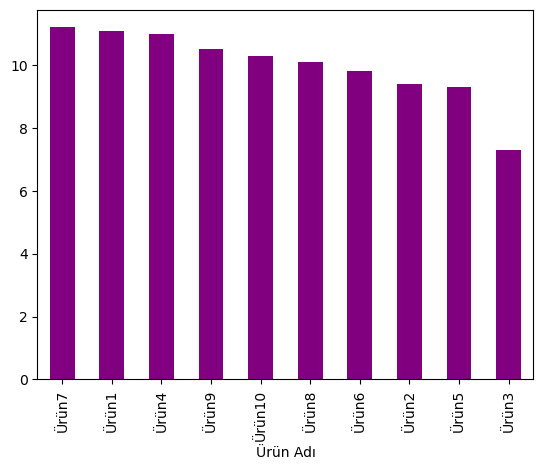

In [15]:
((df['Ürün Adı'].value_counts()/len(df['Ürün Adı']))*100).plot(kind="bar",color= "purple")
# Ürün Adı Sütunundaki Her Bir Değerin Sıklık Sayısını Toplam Ürün Sayısına Bölerek ve Paydayı 100 İle Çarparak Yüzdesini Hesapladığımız Değerleri Mor Bir Çubuk Grafiğinde Gösterdik.

In [16]:
df['Kategori'].value_counts() # Kategori Sütunundaki Değerlerin Kaç Kez Tekrar Ettiğini Görüntüledik.

Kategori
Elektronik    223
Giyim         218
Aksesuar      203
Kozmetik      182
Ev & Bahçe    174
Name: count, dtype: int64

Text(0.5, 1.0, 'Kategori Dağılımı')

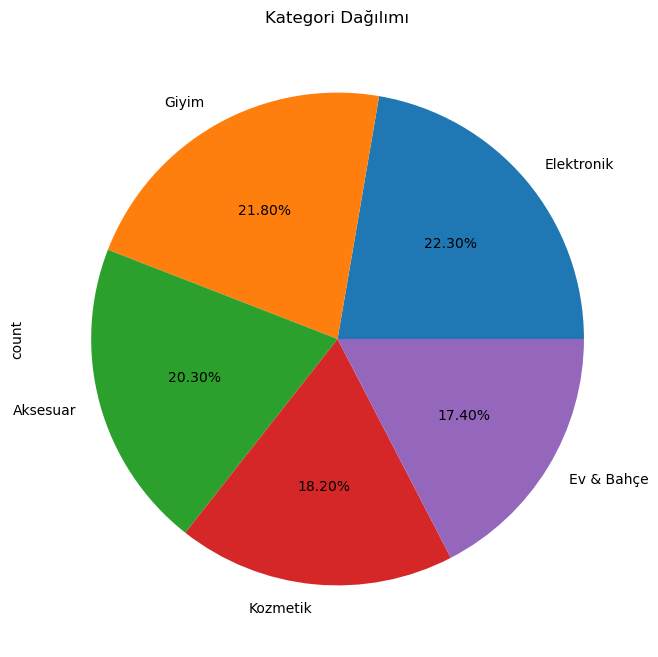

In [17]:
plt.figure(figsize=(8, 8)) # Grafiğin Boyutunu 8x8 İnç Olarak Ayarladık.
((df['Kategori'].value_counts()/len(df['Kategori']))*100).plot(kind="pie", autopct='%.2f%%')
# Kategori Sütunundaki Her Bir Değerin Sıklık Sayısını Toplam Kategori Sayısına Bölerek ve Paydayı 100 İle Çarparak Yüzdesini Hesapladığımız Değerleri Pasta Grafiğinde Gösterdik.
plt.title('Kategori Dağılımı') # Grafiğin Başlığını Yazdık.

In [18]:
df['Marka'].value_counts() # Marka Sütunundaki Değerlerin Kaç Kez Tekrar Ettiğini Görüntüledik.

Marka
Marka3    239
Marka1    218
Marka5    189
Marka4    181
Marka2    173
Name: count, dtype: int64

Text(0.5, 1.0, 'Marka Dağılımı')

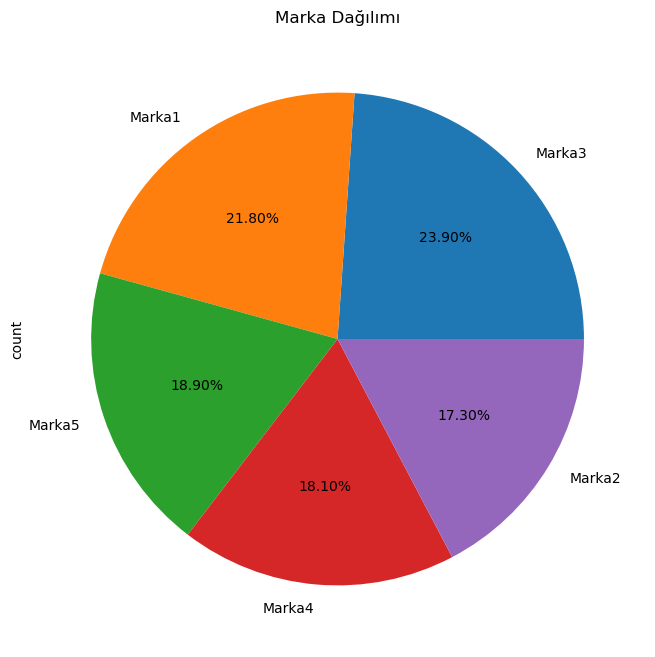

In [19]:
plt.figure(figsize=(8, 8)) # Grafiğin Boyutunu 8x8 İnç Olarak Ayarladık.
((df['Marka'].value_counts()/len(df['Marka']))*100).plot(kind="pie", autopct='%.2f%%')
# Marka Sütunundaki Her Bir Değerin Sıklık Sayısını Toplam Marka Sayısına Bölerek ve Paydayı 100 İle Çarparak Yüzdesini Hesapladığımız Değerleri Pasta Grafiğinde Gösterdik.
plt.title('Marka Dağılımı') # Grafiğin Başlığını Yazdık.

**Ürün Fiyat Dağılımı**

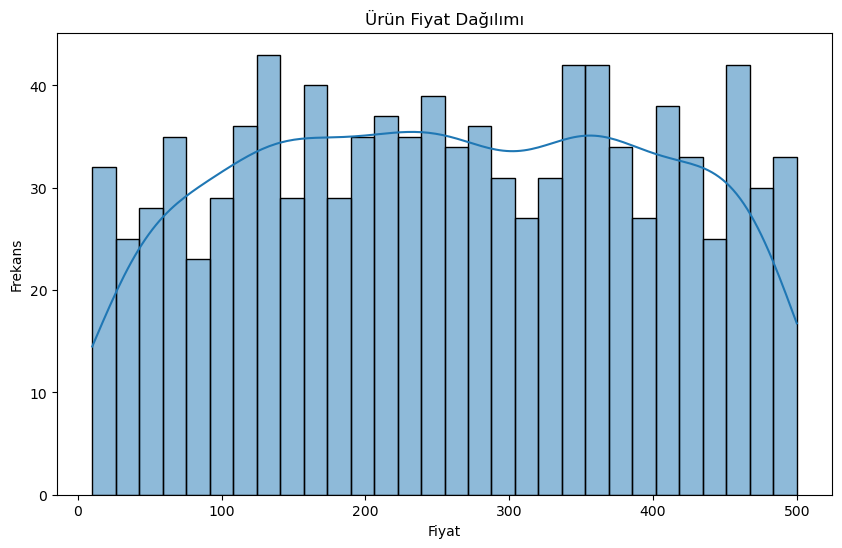

In [20]:
plt.figure(figsize=(10, 6)) # Grafiğin Boyutunu 10x6 İnç Olarak Ayarladık.
sns.histplot(data=df, x='Fiyat', bins=30, kde=True) # Seaborn Kütüphanesini Kullanarak Histogram Grafiği Çizdirdik.
# bins = 30: Histogramda 30 Çubuk Kullandık.
# kde = True: Veri Yoğunluğunu Gösteren Kernel Yoğunluk Tahmini Eğrisini Ekledik.
plt.title('Ürün Fiyat Dağılımı') # Grafiğin Başlığını Yazdık.
plt.xlabel('Fiyat') # X Ekseninde Fiyat Değerleri Olduğunu Belirttik.
plt.ylabel('Frekans') # Y Ekseninde Bu Değerlerin Sıklık Miktarları Olduğunu Belirttik.
plt.show() # Hazırladığımız Grafiği Görüntüledik.

* Grafiğimizde ürün fiyatları 20 ile 45 lira arasında dalgalanıyor. Ancak fiyatların büyük çoğunluğu 30 ila 40 lira * arasında yoğunlaşıyor.
* Grafikte en yüksek frekans 35-40 lira aralığında görülüyor. Yani bu fiyat aralığı ürünün en çok tercih edilen ve satılan fiyat seviyeleri.

* Fiyatlar 35-40 lira aralığından uzaklaştıkça, hem düşük hem de yüksek fiyatlarda frekans giderek azalıyor. Yani aşırı düşük veya aşırı yüksek fiyatlar daha az tercih ediliyor.

* 50 ve 100 lira gibi bazı aykırı fiyat noktaları da mevcut ancak bunlar çok daha seyrek gözlenen durumlar.

**Satış Sayısı ve Stok Miktarı**

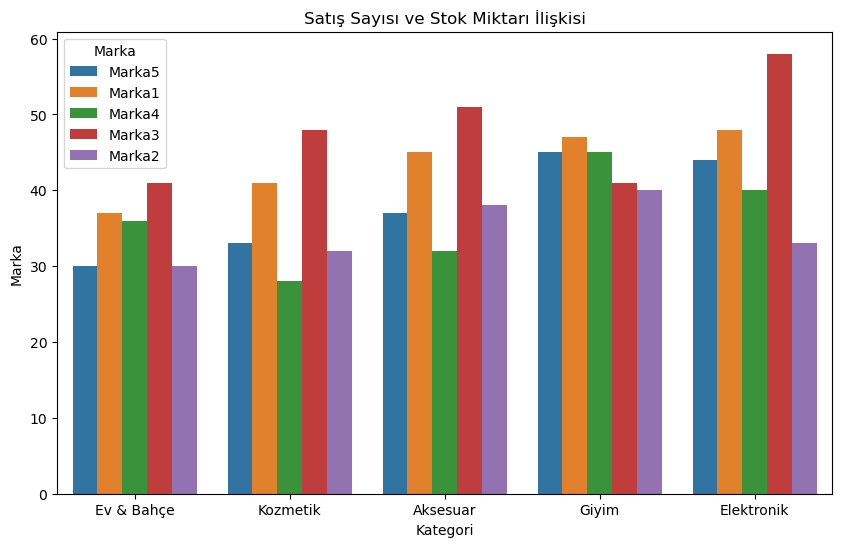

In [21]:
plt.figure(figsize=(10,6)) # Grafiğin Boyutunu 10x6 İnç Olarak Ayarladık.
sns.countplot(x="Kategori",hue="Marka", data=df) # Seaborn Kütüphanesini Kullanarak Countplot Grafiği Çizdirdik.
# x= Kategori: Grafikte X Ekseninde 'Kategori' Sütununu Kullandık.
# hue = Marka: Marka Sütununa Göre İşlem Yapılacağını Söyledik.
plt.title('Satış Sayısı ve Stok Miktarı İlişkisi') # Grafiğin Başlığını Yazdık.
plt.xlabel('Kategori') # X Ekseninde Kategori Değerleri Olduğunu Belirttik.
plt.ylabel('Marka') # Y Ekseninde Marka Değerleri Olduğunu Belirttik.
plt.show() # Hazırladığımız Grafiği Görüntüledik.

* Tüm kategorilerde Marka5 satış sayısının ve stok miktarının en yüksek olduğu görülüyor. Buna karşılık Marka1'in diğer markalara kıyasla daha düşük satış ve stok seviyelerine sahip olduğu anlaşılıyor.

* Kategori bazında incelendiğinde, Elektronik ürünlerde Marka5'in satış ve stok miktarının diğer markalara kıyasla çok daha baskın olduğu dikkat çekiyor. Giyim kategorisinde ise Marka4 ve Marka5'in öne çıktığı görülüyor.

* Aksesuar kategorisinde ise Marka3, Marka4 ve Marka5 arasında daha dengeli bir dağılım söz konusu. Kozmetik ve Ev & Bahçe kategorilerinde de markalar arasındaki satış ve stok oranları görece daha dengeli.

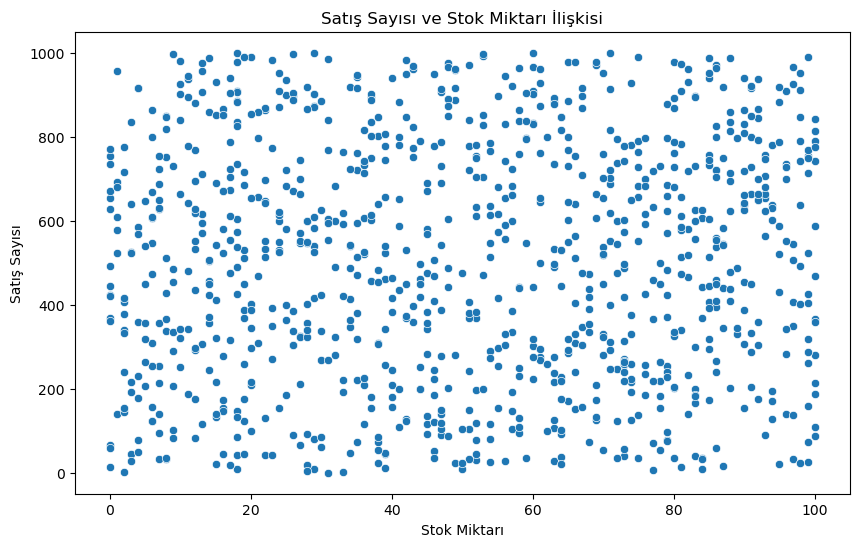

In [22]:
# Satış sayısı ve stok miktarını saçılma grafiği ile göstermek
plt.figure(figsize=(10, 6)) # Grafiğin Boyutunu 10x6 İnç Olarak Ayarladık.
sns.scatterplot(data=df, x='Stok Miktarı', y='Satış Sayısı') # Grafikteki Eksenleri Belirledik.
plt.title('Satış Sayısı ve Stok Miktarı İlişkisi') # Grafiğin Başlığını Yazdık.
plt.xlabel('Stok Miktarı') # X Ekseninde Stok Miktarı Değerleri Olduğunu Belirttik.
plt.ylabel('Satış Sayısı') # Y Ekseninde Satış Sayısı Değerleri Olduğunu Belirttik.
plt.show() # Grafiği Görüntüledik.


* Grafikte, ürün stok miktarı ve satış sayısı arasında genel olarak pozitif bir korelasyon görülmektedir. Yani stok miktarı arttıkça satış sayısı da genellikle artma eğilimindedir.<br>
* Bununla birlikte, grafikte çok sayıda noktanın oldukça geniş bir alanda dağıldığı görülmektedir. Bu, stok miktarı ve satış sayısı arasındaki ilişkinin doğrusal olmadığını ve birçok diğer faktörün de satış sayısını etkilediğini göstermektedir.<br>
* Grafikte, hem yüksek stok miktarına sahip ürünlerin düşük satış sayılarına sahip olduğu hem de düşük stok miktarına sahip ürünlerin yüksek satış sayılarına sahip olduğu görülmektedir. Bu, stok yönetiminde denge sağlamanın önemini vurgulamaktadır.

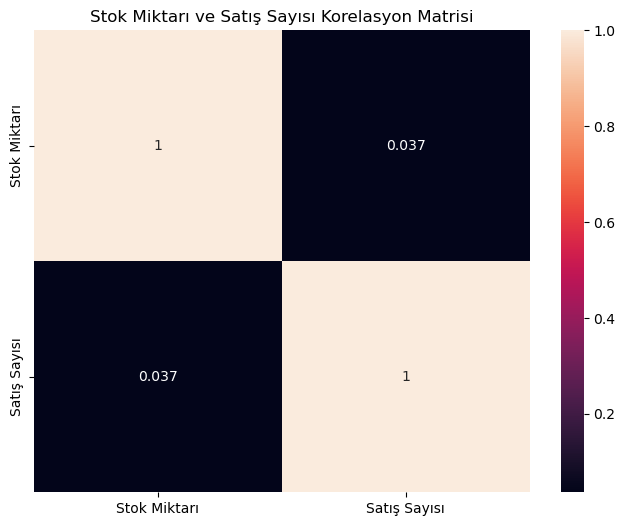

In [23]:
plt.figure(figsize=(8, 6)) # Grafiğin Boyutunu 8x6 İnç Olarak Ayarladık.
corr_matrix = df[['Stok Miktarı', 'Satış Sayısı']].corr() # Stok Miktarı ve Satış Sayısı Sütunları Arasındaki Kolerasyon Matrisini Hesapladık.
sns.heatmap(corr_matrix, annot=True)
# Seaborn Kütüphanesini Kullanarak Korelasyon Matrisinin Isı Haritasını Çizdik.
# 'annot=True' Parametresi İle Her Hücredeki Korelasyon Katsayısını Görselleştirdik.
plt.title('Stok Miktarı ve Satış Sayısı Korelasyon Matrisi') # Grafiğe Başlık Ekledik.
plt.show() # Grafiği Görüntüledik.

* Korelasyon değerinin 0,037 gibi oldukça düşük bir değerde olması, bu iki değişken arasında neredeyse hiçbir doğrusal ilişkinin olmadığını gösteriyor.

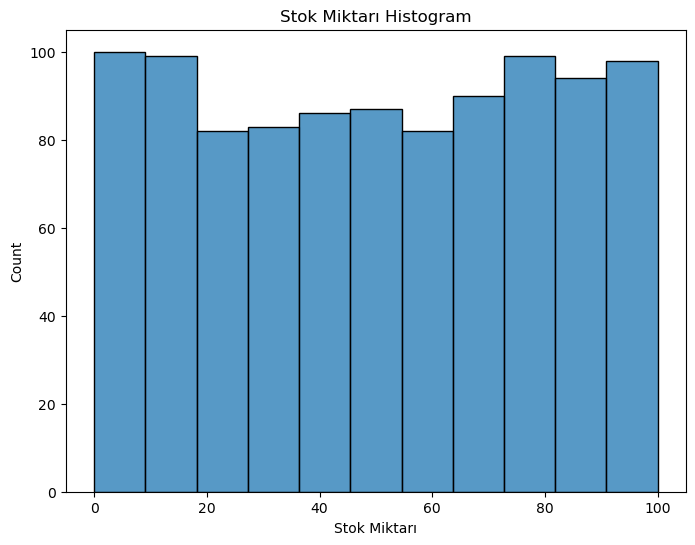

In [24]:
plt.figure(figsize=(8, 6)) # Grafiğin Boyutunu 8x6 İnç Olarak Ayarladık.
sns.histplot(data=df, x='Stok Miktarı') # Histogram Grafiği Çizdirdik.
plt.title('Stok Miktarı Histogram') # Grafiğe Başlık Ekledik.
plt.show() # Grafiği Görüntüledik.

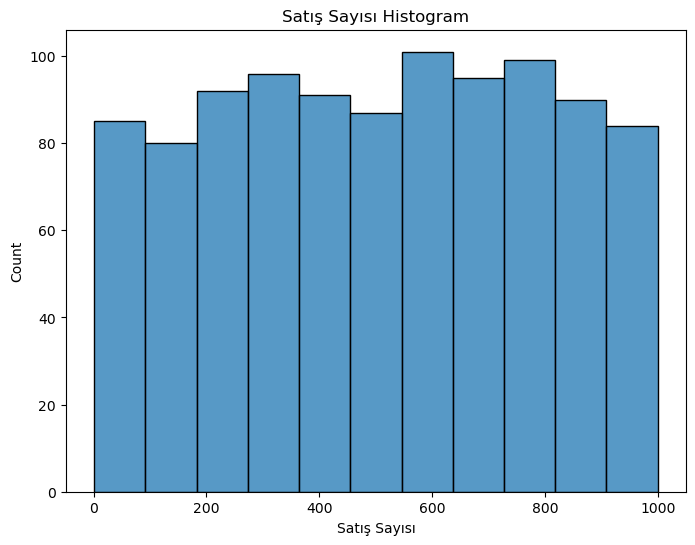

In [25]:
plt.figure(figsize=(8, 6)) # Grafiğin Boyutunu 8x6 İnç Olarak Ayarladık.
sns.histplot(data=df, x='Satış Sayısı') # Histogram Grafiği Çizdik.
plt.title('Satış Sayısı Histogram') # Grafiğe Başlık Ekledik.
plt.show() # Grafiği Görüntüledik.

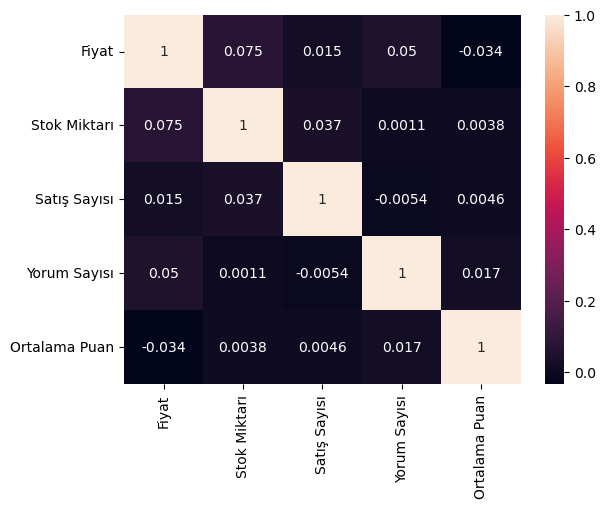

In [26]:
sns.heatmap(df.corr(numeric_only = True), annot = True);
# Veri Setindeki Sayısal Sütunlar Arasındaki Korelasyon Matrisini Hesapladık. Isı Haritasında Görüntüledik.

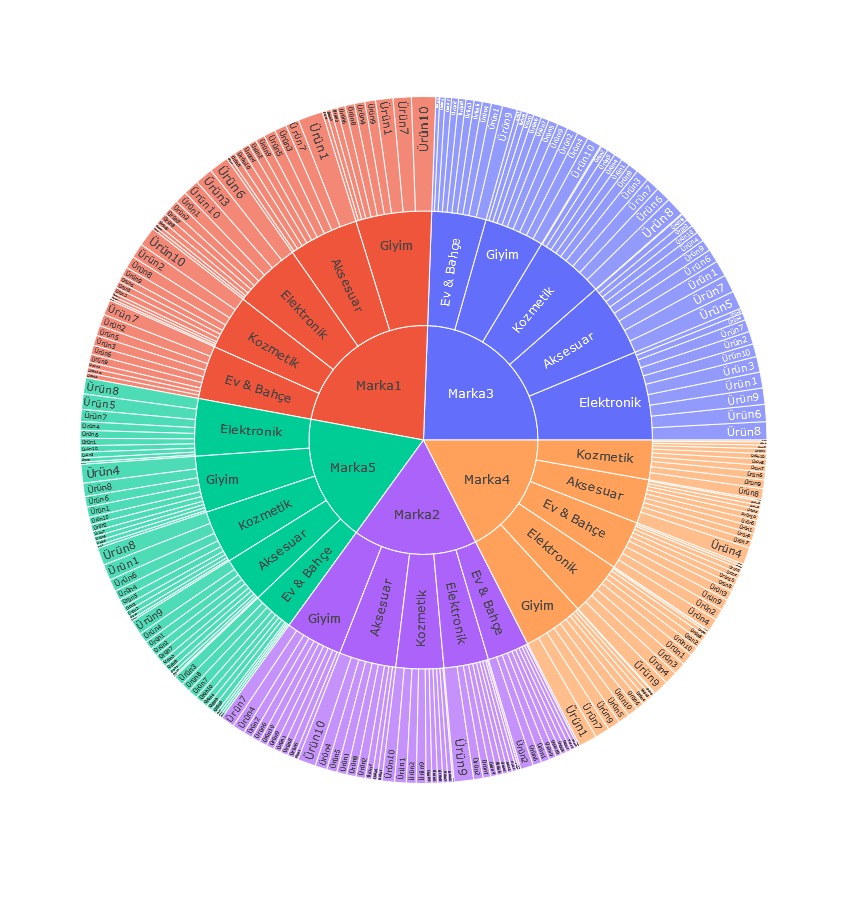

In [27]:
px.sunburst(df, path=['Marka', 'Kategori', 'Ürün Adı'], values='Fiyat', width=900, height=900)
# Plotly Express Kütüphanesini Kullanarak Bir Güneş Işını Diyagramı Çizdik.
# Path Parametresi İle Hiyerarşik Yapıyı Belirttik. (Önce Markalar Sonra Kategoriler En Son da Ürün Adları Görünecek.)
# Values Parametresi İle Her Dilimin Değerini 'Fiyat' Olarak Belirledik.
# Width ve Height İle de Grafiğin Boyutlarını Belirledik.

## 4. Veri Ön İşleme ve Sayısallaştırma

**4. Veri Ön İşleme ve Sayısallaştırma**

Veri Normalizasyonu: Sayısal özellikleri normalize edin.


### Kategorik Değişkenlerin Kodlanması

In [28]:
df["Ürün Adı"] = LabelEncoder().fit_transform(df["Ürün Adı"])
df['Kategori'] = LabelEncoder().fit_transform(df['Kategori'])
df["Marka"] = LabelEncoder().fit_transform(df["Marka"])

* Verilen Sütun Adlarındaki Verileri Label Encoder İle Sayısal Verilere Dönüştürdük.

In [29]:
df # Sayısallaştırılmış Veri Setini Görüntüledik.

Ürün Adı  Kategori  Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0           5         2      4     55            96           283   
1           8         4      0    120            37           835   
2           8         0      4    110            14           457   
3           9         2      3    133             7           254   
4           2         2      2    268            80            35   
..        ...       ...    ...    ...           ...           ...   
995         0         1      3    351            73           418   
996         8         2      4    291            63           735   
997         8         2      4    366            28           867   
998         4         0      0     24            29           610   
999         8         3      2    346            88           859   

     Yorum Sayısı  Ortalama Puan                       Tarih  
0               1            1.9  2024-02-17 15:18:45.291585  
1              11            4.0  2023-07-21 15:18:45.292898  
2               3            2.9  2024-03-19 15:18:45.293026  
3               8            4.7  2024-03-01 15:18:45.293077  
4              12            3.5  2024-05-21 15:18:45.293117  
..            ...            ...                         ...  
995            13            5.0  2023-06-24 15:18:45.327863  
996            33            4.4  2024-04-05 15:18:45.327894  
997             1            3.6  2024-04-26 15:18:45.327925  
998            24            3.8  2023-09-22 15:18:45.327955  
999            45            3.5  2023-09-22 15:18:45.327985  

[1000 rows x 9 columns]

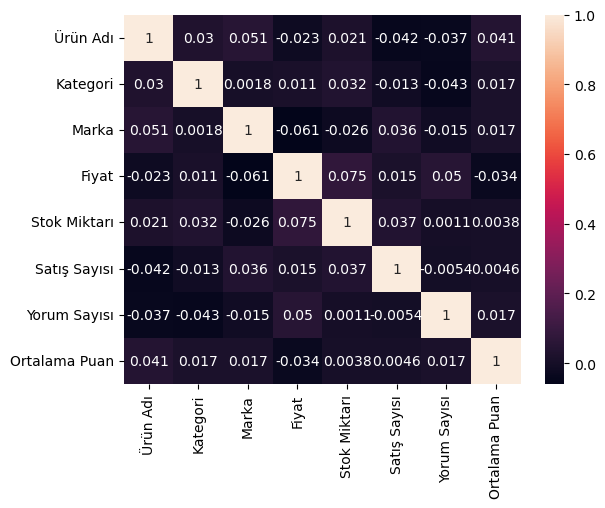

In [30]:
sns.heatmap(df.corr(numeric_only = True), annot = True);
# Veri Setindeki Sayısal Sütunların Kolerasyon Matrisini Hesaplayıp Isı Haritasını Çıkardık.

In [31]:
df['Tarih'] = pd.to_datetime(df['Tarih']) # Tarih Sütununu Datetime Formatına Dönüştürdük.

In [32]:
# Tarihten Yıl, Ay ve Gün Kısımlarını Çektik.
df['Yıl'] = df['Tarih'].dt.year
df['Ay'] = df['Tarih'].dt.month
df['Gün'] = df['Tarih'].dt.day

In [33]:
df.drop('Tarih', axis=1, inplace=True)
# Tarih Sütununu Ayırdıktan Sonra Tekrardan Bir Tarih Sütununa Gerek Olmadığı İçin Sildik. inplace=True İfadesiyle Bunu Kalıcı Hale Getirdik.

In [34]:
df # Güncel Veri Setini Görüntüledik.

Ürün Adı  Kategori  Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0           5         2      4     55            96           283   
1           8         4      0    120            37           835   
2           8         0      4    110            14           457   
3           9         2      3    133             7           254   
4           2         2      2    268            80            35   
..        ...       ...    ...    ...           ...           ...   
995         0         1      3    351            73           418   
996         8         2      4    291            63           735   
997         8         2      4    366            28           867   
998         4         0      0     24            29           610   
999         8         3      2    346            88           859   

     Yorum Sayısı  Ortalama Puan   Yıl  Ay  Gün  
0               1            1.9  2024   2   17  
1              11            4.0  2023   7   21  
2               3            2.9  2024   3   19  
3               8            4.7  2024   3    1  
4              12            3.5  2024   5   21  
..            ...            ...   ...  ..  ...  
995            13            5.0  2023   6   24  
996            33            4.4  2024   4    5  
997             1            3.6  2024   4   26  
998            24            3.8  2023   9   22  
999            45            3.5  2023   9   22  

[1000 rows x 11 columns]

### Özellik Seçimi

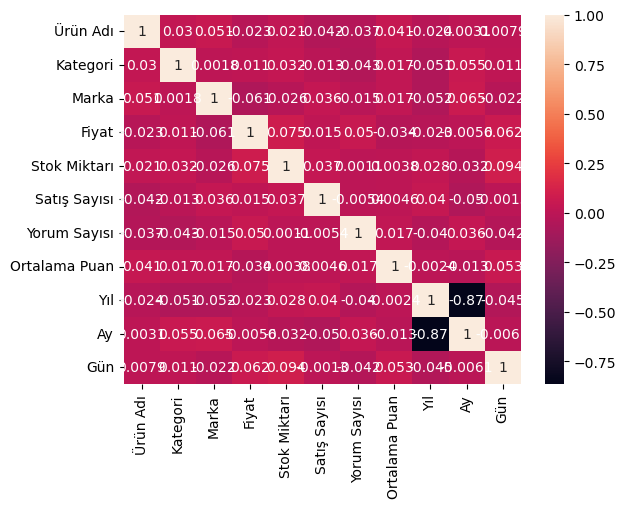

In [35]:
sns.heatmap(df.corr(numeric_only = True), annot = True);
# Veri Setindeki Sayısal Sütunların Kolerasyon Matrisini Hesaplayıp Isı Haritasını Çıkardık.

In [36]:
abs(df.corr(numeric_only=True)["Fiyat"].sort_values(ascending=False))
# Fiyat Sütununun Diğer Sayısal Sütunlarla Olan Korelasyonlarını Aldık. Bu Kolerasyon Değerlerini Büyükten Küçüğe Sıralayıp Mutlak Değerlerini Aldık.

Fiyat            1.000000
Stok Miktarı     0.075156
Gün              0.061908
Yorum Sayısı     0.050037
Satış Sayısı     0.014688
Kategori         0.011037
Ay               0.005592
Yıl              0.023067
Ürün Adı         0.023128
Ortalama Puan    0.033930
Marka            0.060523
Name: Fiyat, dtype: float64

In [37]:
abs(df.corr(numeric_only=True)["Stok Miktarı"].sort_values(ascending=False))
# Stok Miktarı Sütununun Diğer Sayısal Sütunlarla Olan Korelasyonlarını Aldık. Bu Kolerasyon Değerlerini Büyükten Küçüğe Sıralayıp Mutlak Değerlerini Aldık.

Stok Miktarı     1.000000
Gün              0.093675
Fiyat            0.075156
Satış Sayısı     0.036621
Kategori         0.031719
Yıl              0.027784
Ürün Adı         0.020756
Ortalama Puan    0.003773
Yorum Sayısı     0.001087
Marka            0.025729
Ay               0.031868
Name: Stok Miktarı, dtype: float64

In [38]:
abs(df.corr(numeric_only=True)["Ortalama Puan"].sort_values(ascending=False))
# Ortalama Puan Sütununun Diğer Sayısal Sütunlarla Olan Korelasyonlarını Aldık. Bu Kolerasyon Değerlerini Büyükten Küçüğe Sıralayıp Mutlak Değerlerini Aldık.

Ortalama Puan    1.000000
Gün              0.052770
Ürün Adı         0.040765
Kategori         0.017466
Marka            0.017337
Yorum Sayısı     0.016774
Satış Sayısı     0.004591
Stok Miktarı     0.003773
Yıl              0.002440
Ay               0.013169
Fiyat            0.033930
Name: Ortalama Puan, dtype: float64

In [39]:
abs(df.corr(numeric_only=True)["Satış Sayısı"].sort_values(ascending=False))
# Satış Sayısı Sütununun Diğer Sayısal Sütunlarla Olan Korelasyonlarını Aldık. Bu Kolerasyon Değerlerini Büyükten Küçüğe Sıralayıp Mutlak Değerlerini Aldık.

Satış Sayısı     1.000000
Yıl              0.039826
Stok Miktarı     0.036621
Marka            0.035773
Fiyat            0.014688
Ortalama Puan    0.004591
Gün              0.001316
Yorum Sayısı     0.005395
Kategori         0.012813
Ürün Adı         0.042359
Ay               0.049690
Name: Satış Sayısı, dtype: float64

## 5. Model Oluşturma ve Değerlendirme

### Fiyat İçin Modelleme

In [40]:
X=df[['Stok Miktarı', 'Yorum Sayısı', 'Marka','Gün']] # Bağımsız Değişkenler.
y=df['Fiyat'] # Hedef Değişken.

**Veri Setinin Bölünmesi**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Veri Setini Eğitim ve Test Olarak Böldük. Setin %20 sini Teste Verdik. Veri Setinin Bölünmesinin Her Seferinde Aynı Olmasını Sağladık.

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Verileri Ölçeklendirdik. Normalizasyon İşlemini Bu Şekilde Yaptık.

**Lineer Regresyon Modeli**

In [43]:
model = LinearRegression() # Kullanacağımız Model Olan Lineer Regresyon Modelini Oluşturduk.
model.fit(X_train, y_train) # Model Eğitimini Gerçekleştirdik.

LinearRegression()

In [44]:
y_pred = model.predict(X_test) # Model Üzerinde Eğitim Sonrası Test Veri Seti Üzerinde Tahminleme Yaptık.
r2 = r2_score(y_test, y_pred) # R Kare Skorunu Hesapladık.
mse = mean_squared_error(y_test, y_pred) # Ortalama Kare Hatasını Hesapladık.
mae = mean_absolute_error(y_test, y_pred) # Ortalama Mutlak Hatayı Hesapladık.

In [45]:
print(f"Ortalama Mutlak Hata: {mae:.2f}")
print(f"Ortalama Kare Hata: {mse:.2f}")
print(f"R Kare Skoru: {r2:.2f}")

Ortalama Mutlak Hata: 114.36
Ortalama Kare Hata: 17797.84
R Kare Skoru: 0.03


**Lojistik Regresyon Modeli**

In [46]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Model Eğitimi

LogisticRegression()

In [47]:
y_pred = model.predict(X_test_scaled)
# Model Tahmini

In [48]:
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk:", dogruluk)
# Model Değerlendirme

Doğruluk: 0.0


In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Mutlak Hata: {mae:.2f}")
print(f"Ortalama Kare Hata: {mse:.2f}")
print(f"R Kare Skoru: {r2:.2f}")

Ortalama Mutlak Hata: 155.07
Ortalama Kare Hata: 37380.45
R Kare Skoru: -1.04


**Rastgele Orman Regresyon Modeli**

In [50]:
model2 = RandomForestRegressor()
model2.fit(X_train_scaled, y_train)
# 2. Modelimizi Seçip Eğittik.

RandomForestRegressor()

In [51]:
y_pred = model2.predict(X_test_scaled)
# Model Tahmini

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Mutlak Hata: {mae:.2f}")
print(f"Ortalama Kare Hata: {mse:.2f}")
print(f"R Kare Skoru: {r2:.2f}")

Ortalama Mutlak Hata: 124.17
Ortalama Kare Hata: 21839.30
R Kare Skoru: -0.19


### Stok Miktarı İçin Modelleme

**Lineer Regresyon Modeli**

In [53]:
X=df[['Gün', 'Fiyat']]
y=df['Stok Miktarı']
# Bağımlı ve Bağımsız Değişkenleri Belirledik.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Veri Setini Eğitim ve Test Olarak Böldük. Setin %20 sini Teste Verdik. Veri Setinin Bölünmesinin Her Seferinde Aynı Olmasını Sağladık.

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Verileri Ölçeklendirdik.

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
# Model Eğitimi

LinearRegression()

In [57]:
y_pred = model.predict(X_test) # Model Üzerinde Eğitim Sonrası Test Veri Seti Üzerinde Tahminleme Yaptık.

In [58]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Ortalama Mutlak Hata: {mae:.2f}")
print(f"Ortalama Kare Hata: {mse:.2f}")
print(f"R Kare Skoru: {r2:.2f}")

Ortalama Mutlak Hata: 25.27
Ortalama Kare Hata: 865.74
R Kare Skoru: 0.01


**Model Değerlendirmeleri**
* **Fiyat İçin Modelleme**
    * Lineer Regresyon Modeli: Lineer regresyon modeli, bağımsız değişkenler (Stok Miktarı, Yorum Sayısı, Marka, Gün) kullanarak Fiyat (hedef değişken) için tahmin yapmaktadır. Değerlendirme sonuçlarına bakıldığında, modelin performansının kötü olduğu görülüyor. Ortalama Mutlak Hata 114.36, Ortalama Kare Hata 17797.84 ve R Kare Skoru 0.03 olarak hesaplanmış. Düşük R Kare skoru, modelin fiyatı tahmin etmede yetersiz kaldığını gösteriyor.
    * Lojistik Regresyon Modeli: Lojistik regresyon modeli, aynı bağımsız değişkenleri kullanarak fiyatı sınıflandırmaya çalışmaktadır. Ancak model performansı oldukça kötü, doğruluk oranı sadece %0. Ayrıca diğer değerlendirme metrikleri de oldukça yüksek (Ortalama Mutlak Hata 155.07, Ortalama Kare Hata 37380.45, R Kare Skoru -1.04). Lojistik regresyon modeli fiyatı tahmin etmek için uygun görünmüyor.
    * Rastgele Orman Regresyon Modeli: Rastgele Orman Regresyon modeli, lineer regresyon modeline göre daha iyi performans gösteriyor. Ortalama Mutlak Hata 122.97, Ortalama Kare Hata 21560.32 ve R Kare Skoru -0.18 olarak hesaplanmış. Lineer regresyona göre daha iyi sonuçlar verse de, R Kare skorunun hala düşük olması modelin fiyatı tahmin etmede yetersiz kaldığını gösteriyor.
* **Stok Miktarı İçin Modelleme**
    * Lineer Regresyon Modeli: Stok miktarını tahmin etmek için Gün ve Fiyat değişkenleri kullanılmış. Değerlendirme sonuçlarına göre, Ortalama Mutlak Hata 25.27, Ortalama Kare Hata 865.74 ve R Kare Skoru 0.01. Bu sonuçlar, modelin stok miktarını tahmin etmede çok başarılı olmadığını gösteriyor.